# Missing Data Analysis

Approche

- Premier état des lieux des données manquantes --> qu'a-t-on besoin de savoir ?
- Suppression des données inutiles et trop manquantes et pas de lien avec le pb étudié (fréquentation) :pm10, pm2.5
- Comprendre l'évolution des données manquantes selon stations et années 
    -- multiples graphes par station et par année :
    différents profils identifier si les scenari sont différents ou non pour savoir si on fait plusieurs modèles
    -- se limiter à Auber qui contient le moins le données manquantes
    -- la répartition des données manquantes varie par année donc la fourchette temporelle d'une analyse doit être 
    limitée à une année
    -- étudier les plages temporelles de données manquantes (1 heure sur deux il y a qqchose ou un il y a un mois
    manquant)
- Stratégie de remplacement des données manquantes 


NB 
 - Input data 
 - Entrees temp min max (météo)
 - Output data 
 - Sorties air quality analysis


### Packages importations

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data first discovery

In [2]:
data = pd.read_csv('all_data.csv',low_memory =False)

#### Date & Time processing

In [3]:
data['year'],data['month'],data['day'] = data["date"].str.split("-").str
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)
data['hour'],data['minute'],data['second'] = data["time"].str.split(":").str
data['hour'] = data['hour'].astype(int)
data['minute'] = data['minute'].astype(int)
data['second'] = data['second'].astype(int)
data['date'] = pd.to_datetime(data['date'], format = "%Y-%m-%d")
data['time'] = pd.to_datetime(data['time'], format = "%H:%M:%S")
data['time'] = data["time"].dt.time

In [ ]:
data['date_time'] = pd.to_datetime(data['date'], format = "%Y-%m-%d")

#### Missing data

In [4]:
for col in data.columns:
    print("missing data in {} : {} i.e. {}%".format(col,len(data[data[col].isnull()]),
                                                       len(data[data[col].isnull()])/float(len(data)*100)))

missing data in co2 : 34095 i.e. 0.0008681492722772781%
missing data in humi : 17018 i.e. 0.0004333234877728324%
missing data in no : 98614 i.e. 0.0025109744049377184%
missing data in no2 : 46623 i.e. 0.0011871454325086829%
missing data in pm10 : 32425 i.e. 0.000825626635975678%
missing data in pm2.5 : 304035 i.e. 0.007741538759255676%
missing data in station : 0 i.e. 0.0%
missing data in temp : 17114 i.e. 0.00043576790279376264%
missing data in date : 0 i.e. 0.0%
missing data in time : 0 i.e. 0.0%
missing data in precipitation : 538 i.e. 1.369890917979691e-05%
missing data in temp_min : 538 i.e. 1.369890917979691e-05%
missing data in temp_max : 538 i.e. 1.369890917979691e-05%
missing data in ligne : 0 i.e. 0.0%
missing data in stop_id : 0 i.e. 0.0%
missing data in year : 0 i.e. 0.0%
missing data in month : 0 i.e. 0.0%
missing data in day : 0 i.e. 0.0%
missing data in hour : 0 i.e. 0.0%
missing data in minute : 0 i.e. 0.0%
missing data in second : 0 i.e. 0.0%


Top three missing data columns :  
-no  
-pm10  
-pm2.5  
-co2  

WARNING no missing data in timetable, stations ect... because I(romain) generated the data

In [5]:
print(len(data[data["co2"].isnull() & 
                        data["humi"].isnull() &
                        data["no"].isnull() & 
                        data["no2"].isnull() &
                        data["pm10"].isnull() & 
                        data["pm2.5"].isnull() & 
                        data["no2"].isnull() & 
                       data["temp"].isnull()]))

15860


In [6]:
data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,temp_min,temp_max,ligne,stop_id,year,month,day,hour,minute,second
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,8.0,9.0,3,389,2013,1,1,10,0,0
1,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,8.0,9.0,9,402,2013,1,1,10,0,0
2,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,8.0,9.0,a,95,2013,1,1,10,0,0
3,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,-1.0,1.0,3,389,2013,1,15,10,0,0
4,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,-1.0,1.0,9,402,2013,1,15,10,0,0


For 15860 raws, data is missing for almost all sensors (except rain) -> remove all these rows

### Missing data arrays

In [7]:
missing_data = data[data["co2"].isnull() | 
                        data["humi"].isnull() |
                        data["no"].isnull() | 
                        data["no2"].isnull() |
                        data["pm10"].isnull() | 
                        data["pm2.5"].isnull() |
                       data["temp"].isnull()]
missing_data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,temp_min,temp_max,ligne,stop_id,year,month,day,hour,minute,second
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,8.0,9.0,3,389,2013,1,1,10,0,0
1,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,8.0,9.0,9,402,2013,1,1,10,0,0
2,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,8.0,9.0,a,95,2013,1,1,10,0,0
15,NaN,44.2,235.0,48.0,654.0,254.0,auber,17.8,2013-01-17,10:00:00,...,-7.0,0.0,3,389,2013,1,17,10,0,0
16,NaN,44.2,235.0,48.0,654.0,254.0,auber,17.8,2013-01-17,10:00:00,...,-7.0,0.0,9,402,2013,1,17,10,0,0


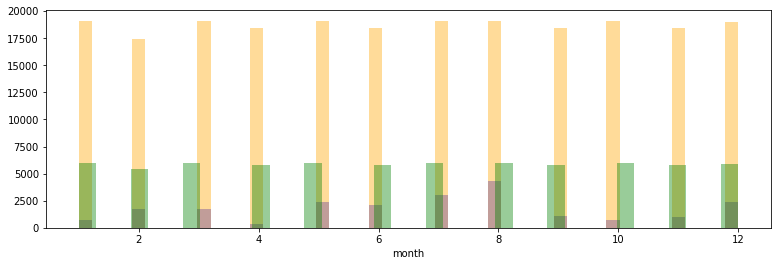

In [8]:
fig, ax = plt.subplots(figsize=(13,4))
sns.distplot(missing_data[missing_data['station'] == 'auber']['month'], ax = ax, kde = False, color='blue')
sns.distplot(missing_data[missing_data['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data[missing_data['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')

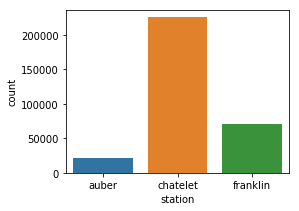

In [9]:
fig, ax = plt.subplots(figsize=(4,3))
ax = sns.countplot(ax=ax,data = missing_data,x="station")

Discrepancies in missing data between the stations. Seems like Chatelet station is lacking a lot of data. 

In [10]:
data_2013 = data[data['date'] < "2013-12-31"]

In [11]:
missing_data_2013 = missing_data[missing_data['date'] < "2014-01-01"]
missing_data_2014 = missing_data[missing_data['date'] < "2015-01-01"]
missing_data_2014 = missing_data_2014[missing_data_2014['date'] > "2013-12-31"]
missing_data_2015 = missing_data[missing_data['date'] < "2016-01-01"]
missing_data_2015 = missing_data_2015[missing_data_2015['date'] > "2014-12-31"]
missing_data_2016 = missing_data[missing_data['date'] < "2017-01-01"]
missing_data_2016 = missing_data_2016[missing_data_2016['date'] > "2015-12-31"]
missing_data_2017 = missing_data[missing_data['date'] < "2018-01-01"]
missing_data_2017 = missing_data_2017[missing_data_2017['date'] > "2016-12-31"]

Text(0.5,1,'2016')

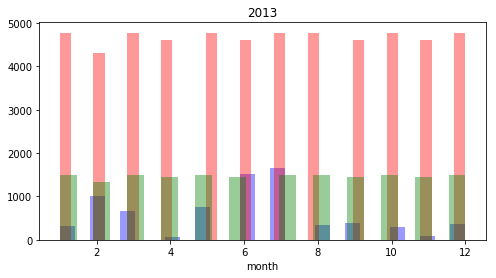

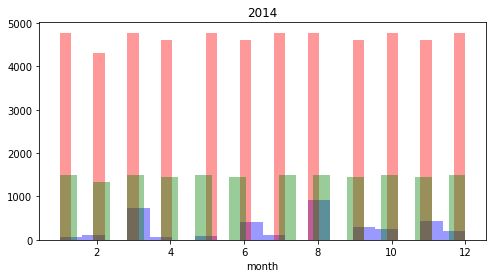

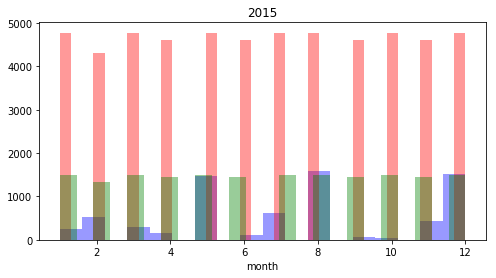

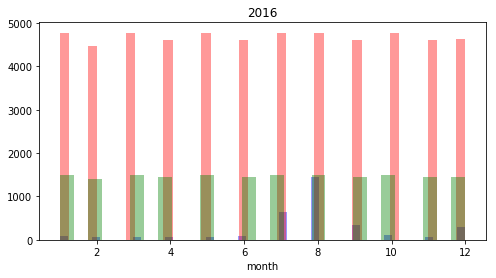

In [12]:

#2013
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2013[missing_data_2013['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2013[missing_data_2013['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2013[missing_data_2013['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2013')

#2014
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2014[missing_data_2014['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2014[missing_data_2014['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2014[missing_data_2014['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2014')

#2015
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2015[missing_data_2015['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2015[missing_data_2015['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2015[missing_data_2015['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2015')

#2016
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2016[missing_data_2016['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2016[missing_data_2016['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2016[missing_data_2016['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2016')

Quantité d'informations manquantes similaires d'année en année en moyenne.
Pas de saisonnalité dans les données manquantes de Chatelet et Franklin. 
En revanche, évolution au cours de l'année pour Auber. Cette fois-ci le comportement varie d'une année sur l'autre. Certains années, la majorite des données manquantes apparaît autour des mois de l'été, d'autres années, non. 
Ainsi si l'on met de côté Chatelet et Franklin au vu de l'écart du montant des données manquantes, il ne nous reste qu'Auber. En ne gardant qu'Auber, il est judicieux de ne garder qu'une année en particulier pour faire un modèle car les scénarios sont différents

### Plage des données manquantes

In [13]:
missing_data_2016_auber = missing_data_2016[missing_data_2016["station"] == "auber"]
missing_data_2016_auber.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,temp_min,temp_max,ligne,stop_id,year,month,day,hour,minute,second
3159,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-07-30,10:00:00,...,16.0,23.0,3,389,2016,7,30,10,0,0
3160,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-07-30,10:00:00,...,16.0,23.0,9,402,2016,7,30,10,0,0
3161,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-07-30,10:00:00,...,16.0,23.0,a,95,2016,7,30,10,0,0
3162,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-08-02,10:00:00,...,20.0,23.0,3,389,2016,8,2,10,0,0
3163,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-08-02,10:00:00,...,20.0,23.0,9,402,2016,8,2,10,0,0


In [58]:
missing_data_2016_auber_modified=missing_data_2016_auber.fillna("1")
missing_data_2016_auber_modified.head()


,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,temp_min,temp_max,ligne,stop_id,year,month,day,hour,minute,second
3159,1,1,1,1,1,1,auber,1,2016-07-30,10:00:00,...,16,23,3,389,2016,7,30,10,0,0
3160,1,1,1,1,1,1,auber,1,2016-07-30,10:00:00,...,16,23,9,402,2016,7,30,10,0,0
3161,1,1,1,1,1,1,auber,1,2016-07-30,10:00:00,...,16,23,a,95,2016,7,30,10,0,0
3162,1,1,1,1,1,1,auber,1,2016-08-02,10:00:00,...,20,23,3,389,2016,8,2,10,0,0
3163,1,1,1,1,1,1,auber,1,2016-08-02,10:00:00,...,20,23,9,402,2016,8,2,10,0,0


In [59]:
type(missing_data_2016_auber_modified)
missing_data_2016_auber_modified.empty
missing_data_2016_auber_modified.dtypes
missing_data_2016_auber_modified[['co2','humi', 'no', 'no2', 'pm10','pm2.5','temp','temp_min','temp_max']] = missing_data_2016_auber_modified[['co2','humi', 'no', 'no2', 'pm10','pm2.5','temp','temp_min','temp_max']].apply(pd.to_numeric)
missing_data_2016_auber_modified.dtypes

co2                     float64
humi                    float64
no                      float64
no2                     float64
pm10                    float64
pm2.5                   float64
station                  object
temp                    float64
date             datetime64[ns]
time                     object
precipitation            object
temp_min                float64
temp_max                float64
ligne                    object
stop_id                   int64
year                      int32
month                     int32
day                       int32
hour                      int32
minute                    int32
second                    int32
dtype: object

PROBLEME D'AFFICHAGE DU GRAPHIQUE POUR CERTAINES COLONNES EN ORDONNEE DONT LA QUALITE DE L'AIR : POURQUOI ???

In [60]:
missing_data_2016_auber_modified_co2 = missing_data_2016_auber_modified[missing_data_2016_auber_modified["co2"] == 1]

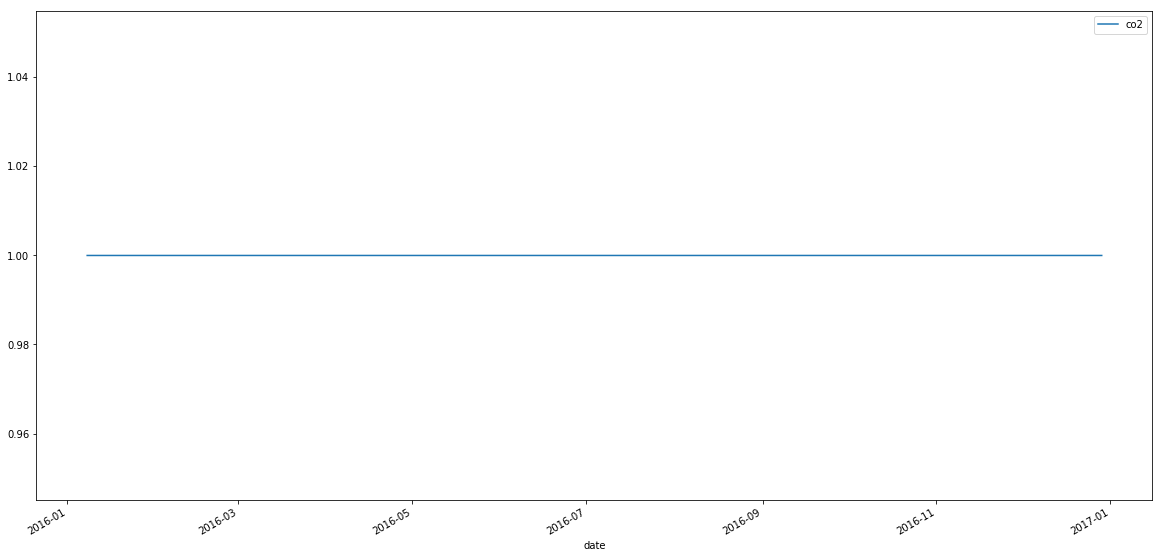

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
missing_data_2016_auber_modified_co2.plot(x = "date",y = "co2", ax=ax)

In [17]:
missing_data_co2 = data[data["co2"].isnull()]
missing_data_humi = data[data["humi"].isnull()]
missing_data_no = data[data["no"].isnull()]
missing_data_no2 = data[data["no2"].isnull()]
missing_data_pm10 = data[data["pm10"].isnull()]
missing_data_pm2_5 = data[data["pm2.5"].isnull()]
missing_data_no2 = data[data["no2"].isnull()]
missing_data_temp = data[data["temp"].isnull()]

missing_data_co2.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,temp_min,temp_max,ligne,stop_id,year,month,day,hour,minute,second
15,NaN,44.2,235.0,48.0,654.0,254.0,auber,17.8,2013-01-17,10:00:00,...,-7.0,0.0,3,389,2013,1,17,10,0,0
16,NaN,44.2,235.0,48.0,654.0,254.0,auber,17.8,2013-01-17,10:00:00,...,-7.0,0.0,9,402,2013,1,17,10,0,0
17,NaN,44.2,235.0,48.0,654.0,254.0,auber,17.8,2013-01-17,10:00:00,...,-7.0,0.0,a,95,2013,1,17,10,0,0
75,NaN,46.3,201.0,49.0,547.0,240.0,auber,18.6,2013-02-08,10:00:00,...,0.0,4.0,3,389,2013,2,8,10,0,0
76,NaN,46.3,201.0,49.0,547.0,240.0,auber,18.6,2013-02-08,10:00:00,...,0.0,4.0,9,402,2013,2,8,10,0,0


In [50]:
#fig, ax = plt.subplots(figsize=(20,10))
#sns.distplot(missing_data_co2[missing_data_co2['station'] == 'auber']['month'],missing_data_no[missing_data_no['station'] == 'auber']['month'],ax = ax, kde = False)
#missing_data_co2.plot(x = 'date',y = 'co2', ax = ax)
#missing_data_co2.plot(x='date', y= 'station', ax = ax)
#missing_data_no.plot(x='date', y= 'station', ax = ax)
#plt.show()
#Z= append.([np.ones_like(missing_data_co2)], Z.missing_data_co2,0).missing_data_co2

L = len(missing_data_co2)
print(L)
L = int(L)
M = np.ones(L)
#missing_data_co2.append(M)
type(missing_data_co2)


34095


pandas.core.frame.DataFrame

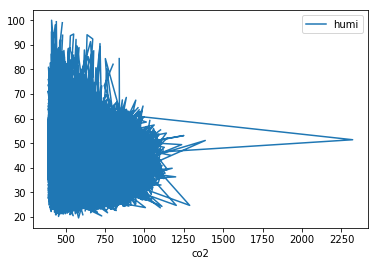

In [55]:
data.plot(x = 'co2',y = 'humi')

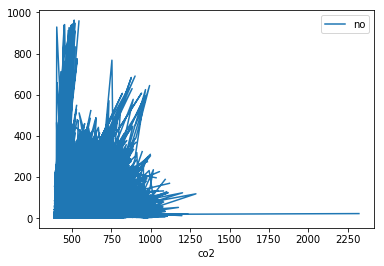

In [56]:
data.plot(x = 'co2',y = 'no')

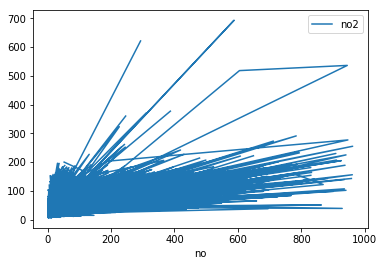

In [57]:
data.plot(x = 'no',y = 'no2')

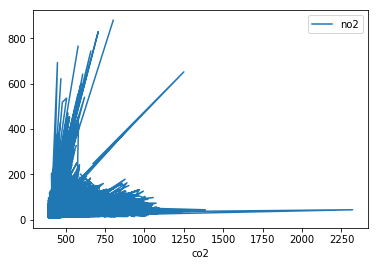

In [60]:
data.plot(x = 'co2',y = 'no2')

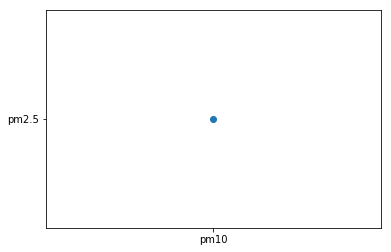

In [64]:
plt.scatter(x = 'pm10',y = 'pm2.5')
plt.show()

In [81]:
def valeur(x):
    return [len(data[data[x].isnull() & 
                        data["co2"].isnull()]),len(data[data[x].isnull() & 
                        data["humi"].isnull()]), len(data[data[x].isnull() & 
                        data["no"].isnull()]),len(data[data[x].isnull() & 
                        data["no2"].isnull()]),len(data[data[x].isnull() & 
                        data["pm10"].isnull()]),len(data[data[x].isnull() & 
                        data["pm2.5"].isnull()]),len(data[data[x].isnull() & 
                        data["temp"].isnull()])]
                

d =  {'col1' : valeur('co2'),'col2': valeur('humi'),'col3' : valeur('no'), 
      'col4': valeur ('no2'), 'col5' : valeur('pm10'), 'col6': valeur('pm2.5'), 'col7' : valeur('temp')}


df1= pd.DataFrame(data=d, index = ['missing data co2','missing data humi', 'missing data no', 
             'missing data no2', 'missing data pm10', 'missing data pm2.5', 'missing data temp'])
df1.columns=['missing data co2', 'missing data humi', 'missing data no', 
             'missing data no2', 'missing data pm10', 'missing data pm2.5', 'missing data temp']


df1
                                                   

,missing data co2,missing data humi,missing data no,missing data no2,missing data pm10,missing data pm2.5,missing data temp
missing data co2,34095,15977,21284,19053,17743,30287,16084
missing data humi,15977,17018,15955,15924,15906,17008,16985
missing data no,21284,15955,98614,46621,19597,89744,16068
missing data no2,19053,15924,46621,46623,17246,38726,16037
missing data pm10,17743,15906,19597,17246,32425,31151,15941
missing data pm2.5,30287,17008,89744,38726,31151,304035,17096
missing data temp,16084,16985,16068,16037,15941,17096,17114


Nombre de données manquantes 
en binome:
min missing data pm10 et humi 15 906
max missing data pm2.5 et no 89744
en absolu : 
min humi 
max pm2.5


In [76]:
df1.min

<bound method DataFrame.min of                     missing data co2  missing data humi  missing data no  \
missing data humi              15977              17018            15955   
missing data no                21284              15955            98614   
missing data no2               19053              15924            46621   
missing data pm10              17743              15906            19597   
missing data pm2.5             30287              17008            89744   
missing data temp              16084              16985            16068   

                    missing data no2  missing data pm10  missing data pm2.5  \
missing data humi              15924              15906               17008   
missing data no                46621              19597               89744   
missing data no2               46623              17246               38726   
missing data pm10              17246              32425               31151   
missing data pm2.5             38726     

In [78]:
which.min(apply(df1,min))

NameError: name 'which' is not defined

In [79]:
df1.idxmin()


missing data co2      missing data humi
missing data humi     missing data pm10
missing data no       missing data humi
missing data no2      missing data humi
missing data pm10     missing data humi
missing data pm2.5    missing data humi
missing data temp     missing data pm10
dtype: object

In [90]:
#def missing_data_year(year):
#    return  missing_data_pm2_5[missing_data_pm2_5['year'] == year ]

#m_d_2013 = missing_data_year('2013')

df2 = data[data['year'] == "2013"]
df2 = missing_data_pm2_5[missing_data_pm2_5['year'] == '2013']

#fig, ax = plt.subplots(figsize=(20,10))
#sns.distplot(m_d_2013[m_d_2013['station'] == 'auber']['month'], ax = ax, kde = False)

c:\program files\python36\lib\site-packages\pandas\core\ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [91]:
data.std()

co2              132.495035
humi               8.516972
no                51.174799
no2               21.009427
pm10             102.881077
pm2.5             53.734651
temp               4.157270
precipitation      3.726569
temp_min           5.773361
temp_max           7.700643
stop_id          199.220394
year               1.118045
month              3.446912
day                8.793717
hour               6.771134
minute             0.000000
second             0.000000
dtype: float64